In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install opencv-python

In [3]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=bfd5d6c88734748af78bb22eda0371f5d795492c374bff859d47cddd0897ccf9
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [4]:
!pip install tensorflow

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.layers import BatchNormalization
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.utils import to_categorical

2025-09-13 03:23:37.312608: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-13 03:23:37.312736: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-13 03:23:37.453952: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
#Process 1:- Extract the features of all image for Image Augumentation
import cv2
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [8]:
loc1 = '../input/dogsvscats/train/dogs'
loc2 = '../input/dogsvscats/train/cats'

features = []
for image in tqdm(os.listdir(loc1)):
    f = cv2.imread(os.path.join(loc1,image))
    fr = cv2.resize(f,(60,60))
    features.append(fr)
    
for image in tqdm(os.listdir(loc2)):
    f = cv2.imread(os.path.join(loc2,image))
    fr = cv2.resize(f,(60,60))
    features.append(fr)


100%|██████████| 10000/10000 [01:39<00:00, 100.91it/s]


In [9]:
labels = []
for image in tqdm(os.listdir(loc1)):
    labels.append(0)
for image in tqdm(os.listdir(loc1)):
    labels.append(1)

100%|██████████| 10000/10000 [00:00<00:00, 3094970.48it/s]


In [10]:
X = np.array(features)
Y = np.array(labels)

In [11]:
print(X.shape)
print(Y.shape)

(20000, 60, 60, 3)
(20000,)


In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8)

In [13]:
#Standard Normalization the features value
#Xn = (X - mean(X))/std(X)

mean = np.mean(xtrain,axis=(0,1,2,3))
std = np.std(xtrain,axis=(0,1,2,3))

xtrain_n = (xtrain - mean)/std
xtest_n = (xtest - mean)/std

In [14]:
#One hot encoding of output label
ytrain_h = to_categorical(ytrain)
ytest_h = to_categorical(ytest)

In [ ]:
#Decaying learning rate
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

In [15]:
#Create a Model for predictions
xtrain_n.shape[1:]

(60, 60, 3)

In [20]:
model = Sequential()

model.add(Conv2D(32 , (3,3), padding = 'same', activation='relu', input_shape=xtrain_n.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32 , (3,3), padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64 , (3,3), padding = 'same' , activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64 , (3,3), padding = 'same' , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(128 , (3,3), padding = 'same' , activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128 , (3,3), padding = 'same' , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2,activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 60, 60, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 60, 60, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                      

In [22]:
#Data Augumentation
datagen = ImageDataGenerator(rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True)
datagen.fit(xtrain_n)

In [23]:
sgd = keras.optimizers.SGD(lr=0.001)
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [26]:
#Fit the information into the model to train it
history = model.fit(xtrain_n,ytrain_h,batch_size = 64,
                   epochs=30,validation_data=(xtest_n,ytest_h))

Epoch 1/30


2025-09-13 03:32:50.121851: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1757734373.798517     129 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 [==============================] - 19s 39ms/step - loss: 0.6062 - accuracy: 0.6774 - val_loss: 0.9384 - val_accuracy: 0.5080
Epoch 2/30
250/250 [==============================] - 9s 35ms/step - loss: 0.4810 - accuracy: 0.7674 - val_loss: 0.4901 - val_accuracy: 0.7745
Epoch 3/30
250/250 [==============================] - 9s 35ms/step - loss: 0.4065 - accuracy: 0.8143 - val_loss: 0.5777 - val_accuracy: 0.7638
Epoch 4/30
250/250 [==============================] - 9s 35ms/step - loss: 0.3504 - accuracy: 0.8442 - val_loss: 0.4051 - val_accuracy: 0.8242
Epoch 5/30
250/250 [==============================] - 9s 35ms/step - loss: 0.2984 - accuracy: 0.8692 - val_loss: 0.3973 - val_accuracy: 0.8245
Epoch 6/30
250/250 [==============================] - 9s 35ms/step - loss: 0.2628 - accuracy: 0.8868 - val_loss: 0.3656 - val_accuracy: 0.8440
Epoch 7/30
250/250 [==============================] - 9s 35ms/step - loss: 0.2255 - accuracy: 0.9039 - val_loss: 0.4337 - val_accuracy: 0.8440
Epoch 8/3

In [27]:
print(model.evaluate(xtrain_n,ytrain_h))
print(model.evaluate(xtest_n,ytest_h))

500/500 [==============================] - 2s 5ms/step - loss: 0.0075 - accuracy: 0.9973
[0.00749512854963541, 0.9973124861717224]
125/125 [==============================] - 1s 5ms/step - loss: 0.5105 - accuracy: 0.9010
[0.510532796382904, 0.9010000228881836]


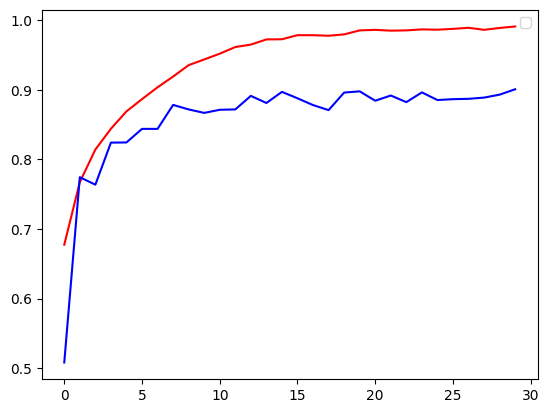

In [31]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.legend()
plt.show()

1/1 [==============================] - 1s 578ms/step
1
1/1 [==============================] - 0s 20ms/step
Prediction: Cat


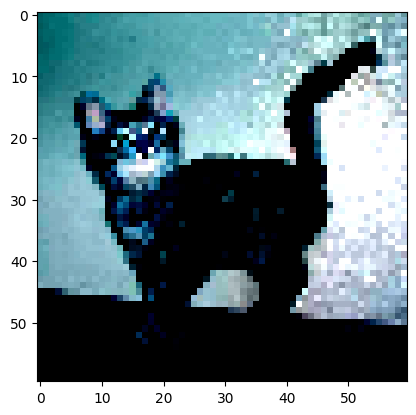

In [32]:
predicted_labels = np.array(['Dog','Cat'])

print(np.argmax(model.predict(xtest_n[10].reshape(1,60,60,3))))
print("Prediction:",predicted_labels[np.argmax(model.predict(xtest_n[10].reshape(1,60,60,3)))])

plt.imshow(xtest_n[10])
plt.show()

In [33]:
im = cv2.imread('../input/dogsvscats/test/dogs/dog.10044.jpg')
im = cv2.resize(im,(60,60))
im_n = (im - mean)/std

1/1 [==============================] - 0s 18ms/step
0
1/1 [==============================] - 0s 19ms/step
Prediction: Dog


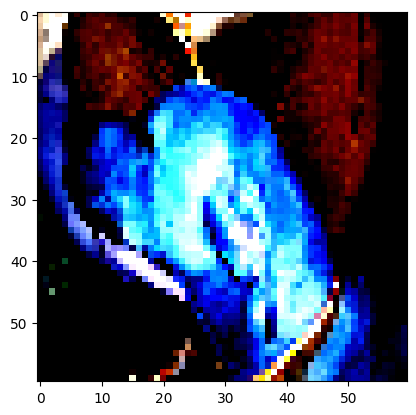

In [34]:
print(np.argmax(model.predict(im_n.reshape(1,60,60,3))))
print("Prediction:",predicted_labels[np.argmax(model.predict(im_n.reshape(1,60,60,3)))])

plt.imshow(im_n)
plt.show()

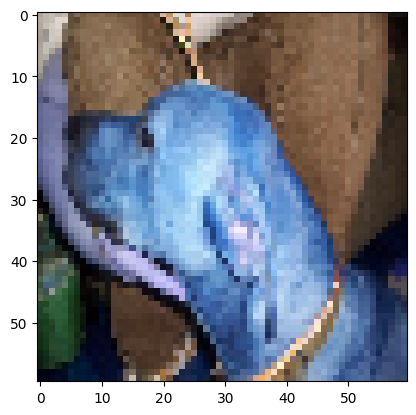

In [35]:
plt.imshow(im)
plt.show()

In [36]:
model.save('CatsvsDogs.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
imported_model = load_model('./CatsvsDogs.h5')

In [ ]:
imported_model.summary()